# Tarefa 02: Analise de dados - Levantamento de questões

Faça uma análise das variáveis  dos dados disponíveis no arquivo dados_reclamacoes_net_2019_2.csv  (https://pucminas.instructure.com/courses/9915/modules/items/610314) e levantem algumas questões que possam ser respondidas através dessa análise.

Por exemplo: Quantos clientes da faixa etária de x a y fizeram reclamações; ou também quantos idosos fizeram compras pela internet.

Gere as hipóteses (questões) e descreva de que forma podem ser respondias.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/dados_reclamacoes_net_2019_2.csv', sep=';')
df.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,NE,PE,Recife,M,entre 21 a 30 anos,04/07/2019,10.0,Vivo - Telefônica (GVT),"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Vício de Qualidade,Suspensão ou desligamento indevido do serviço,Não comprei / contratei,S,S,Finalizada avaliada,Não Resolvida,1.0,1
1,SE,SP,Santana de Parnaíba,M,entre 51 a 60 anos,02/07/2019,7.0,NET,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Atendimento / SAC,SAC - Dificuldade para cancelar o serviço,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
2,SE,RJ,Campos dos Goytacazes,M,entre 21 a 30 anos,01/07/2019,10.0,Vivo - Telefônica (GVT),"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Vício de Qualidade,Funcionamento inadequado do serviço (má qualid...,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
3,SE,SP,Campinas,M,entre 31 a 40 anos,06/07/2019,10.0,Vivo - Telefônica (GVT),"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Vício de Qualidade,Funcionamento inadequado do serviço (má qualid...,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
4,SE,SP,Barueri,F,entre 51 a 60 anos,01/07/2019,10.0,NET,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Informação,Informações incompletas / inadequadas sobre o ...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128408 entries, 0 to 128407
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Região                  128408 non-null  object 
 1   UF                      128408 non-null  object 
 2   Cidade                  128408 non-null  object 
 3   Sexo                    128408 non-null  object 
 4   Faixa Etária            128408 non-null  object 
 5   Data Finalização        128408 non-null  object 
 6   Tempo Resposta          128345 non-null  float64
 7   Nome Fantasia           128408 non-null  object 
 8   Segmento de Mercado     128408 non-null  object 
 9   Área                    128408 non-null  object 
 10  Assunto                 128408 non-null  object 
 11  Grupo Problema          128408 non-null  object 
 12  Problema                128408 non-null  object 
 13  Como Comprou Contratou  128408 non-null  object 
 14  Procurou Empresa    

In [ ]:
df['Data Finalização'] = pd.to_datetime(df['Data Finalização'])
df['Tempo Resposta'] = pd.to_numeric(df['Tempo Resposta'])
df['Nota do Consumidor'] = pd.to_numeric(df['Nota do Consumidor'])
df['Total'] = pd.to_numeric(df['Total'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128408 entries, 0 to 128407
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Região                  128408 non-null  object        
 1   UF                      128408 non-null  object        
 2   Cidade                  128408 non-null  object        
 3   Sexo                    128408 non-null  object        
 4   Faixa Etária            128408 non-null  object        
 5   Data Finalização        128408 non-null  datetime64[ns]
 6   Tempo Resposta          128345 non-null  float64       
 7   Nome Fantasia           128408 non-null  object        
 8   Segmento de Mercado     128408 non-null  object        
 9   Área                    128408 non-null  object        
 10  Assunto                 128408 non-null  object        
 11  Grupo Problema          128408 non-null  object        
 12  Problema                128408

# Quantos idosos fizeram compras pela internet?

In [ ]:
df_compras_pela_internet = df.loc[df['Como Comprou Contratou'] == 'Internet']
df_quantos_idosos_compraram_pela_internet = df_compras_pela_internet.loc[(df_compras_pela_internet['Faixa Etária'] == 'entre 61 a 70 anos') | 
                                                                         (df_compras_pela_internet['Faixa Etária'] == 'mais de 70 anos')].sum()['Total']
print('Idosos que comparam pela internet: ' + str(df_quantos_idosos_compraram_pela_internet))

Idosos que comparam pela internet: 1313


# Quantos clientes da faixa etária de x a y fizeram reclamações?

In [ ]:
df_Reclamacaoes = df.groupby('Faixa Etária').sum()['Total'].reset_index()
df_Reclamacaoes.columns = ['Faixa Etária', 'Total de reclamações']
df_Reclamacaoes

,Faixa Etária,Total de reclamações
0,até 20 anos,2320
1,entre 21 a 30 anos,34766
2,entre 31 a 40 anos,42132
3,entre 41 a 50 anos,22704
4,entre 51 a 60 anos,14343
5,entre 61 a 70 anos,8142
6,mais de 70 anos,4001


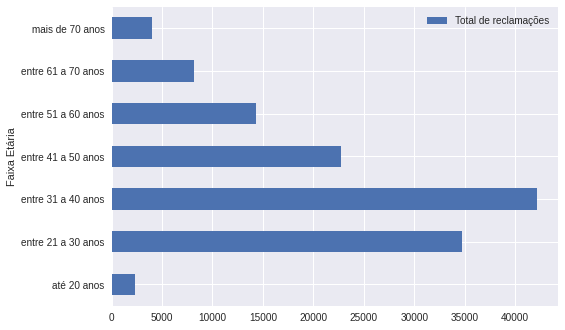

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

ax = df_Reclamacaoes.plot.barh(x='Faixa Etária', y='Total de reclamações', rot=0)

# Qual a faixa etária com maior número de reclamações?

In [ ]:
faixa_etaria_com_maior_numero_de_reclamacoes = df_Reclamacaoes[df_Reclamacaoes['Total de reclamações'] == df_Reclamacaoes['Total de reclamações'].max()]['Faixa Etária'].iloc[0]
print('Faixa etária com maior número de reclamações: ' + faixa_etaria_com_maior_numero_de_reclamacoes)

Faixa etária com maior número de reclamações: entre 31 a 40 anos


# Quais são os problemas que mais ocorrem?

In [ ]:
df_Problemas = df['Problema'].value_counts()[:10]
df_Problemas

Cobrança indevida / abusiva para alterar ou cancelar o contrato                       19471
Oferta não cumprida / serviço não fornecido/ venda enganosa / publicidade enganosa    14467
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado        13751
Funcionamento inadequado do serviço (má qualidade do sinal, instabilidade, queda)     13482
Cobrança após cancelamento do serviço                                                  9822
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo      6307
SAC - Demanda não resolvida / não respondida / respondida após o prazo                 5943
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                   3958
SAC - Dificuldade para cancelar o serviço                                              3945
Alteração de plano/contrato sem solicitação ou aviso prévio                            3924
Name: Problema, dtype: int64

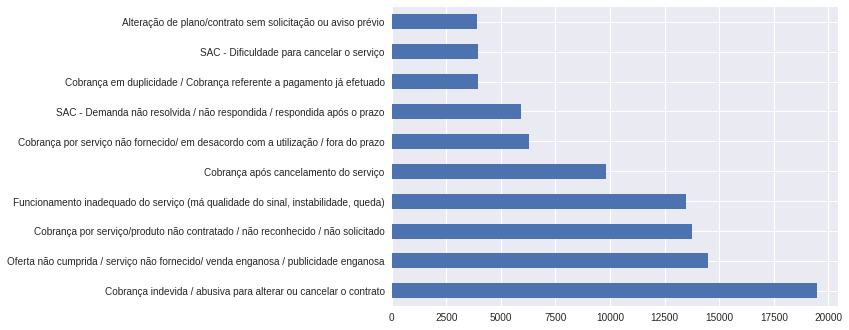

In [ ]:
ax = df_Problemas.plot.barh(x='Faixa Etária', y='Total de reclamações', rot=0)

# Quais as empresas com maior número de problemas?

In [ ]:
df_empresas = df['Nome Fantasia'].value_counts()[:10].reset_index()
df_empresas.columns = [ 'Empresa', 'Quantidade de problemas']
df_empresas

,Empresa,Quantidade de problemas
0,Vivo - Telefônica (GVT),31092
1,NET,22722
2,Tim,20212
3,Oi Fixo,19259
4,Claro Celular,11017
5,SKY,10430
6,Oi Celular,7382
7,Claro TV,2800
8,Nextel,2254
9,Copel Telecom,398


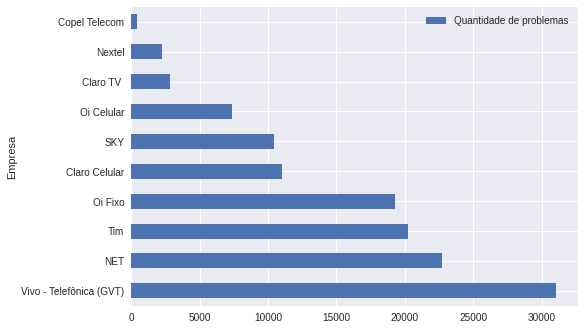

In [ ]:
ax = df_empresas.plot.barh(x='Empresa', y='Quantidade de problemas', rot=0)

# Quais as empresas com menor número de problemas?

In [ ]:
df_empresas = df['Nome Fantasia'].value_counts(ascending=True)[:10].reset_index()
df_empresas.columns = [ 'Empresa', 'Quantidade de problemas']
df_empresas

,Empresa,Quantidade de problemas
0,Net Catanduva,1
1,Linca - Net Foz,3
2,Net Angra,8
3,Algar TV,28
4,Vip Telecom,49
5,Algar Celular,128
6,Algar Fixo,286
7,Claro Fixo - Embratel,339
8,Copel Telecom,398
9,Nextel,2254


# Pessoas mais jovens ou mais velhas que realizam reclamações?

Text(0.5, 1.0, 'Quantidade de ocorrências por estado')

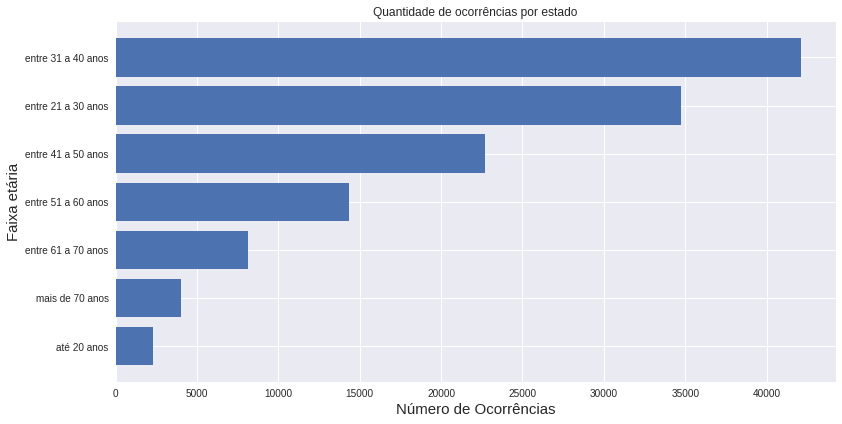

In [ ]:
ocorrencias = df['Faixa Etária'].value_counts(ascending=True).reset_index()
ocorrencias.columns = ['Faixa Etária', 'Ocorrência']

fig = plt.figure(figsize=[10, 5])
ex = fig.add_axes([0, 0, 1, 1])
indices = range(len(ocorrencias))
ex.set_yticks(indices)
ex.set_yticklabels(ocorrencias['Faixa Etária'])
ex.barh(indices, ocorrencias['Ocorrência'])
ex.set_ylabel('Faixa etária', fontsize=15)
ex.set_xlabel('Número de Ocorrências', fontsize=15)
ex.set_title('Quantidade de ocorrências por estado')

# Qual grupo de problemas tem mais reclamações?

Text(0.5, 1.0, 'Quantidade de ocorrências por grupo de problema')

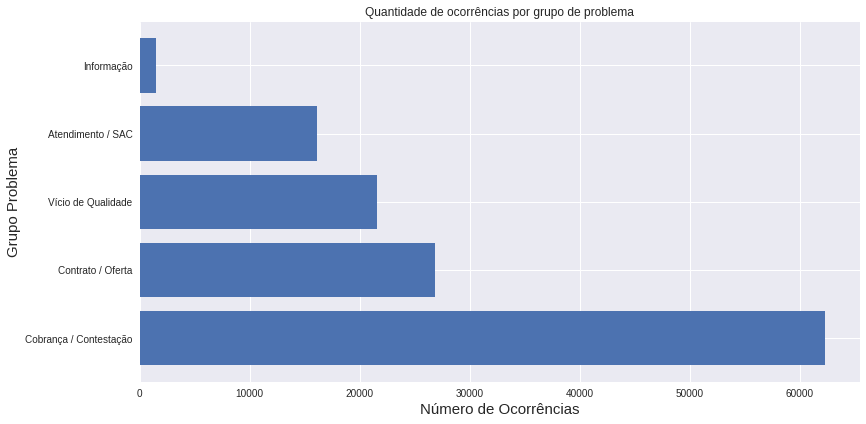

In [ ]:
ocorrencias = df['Grupo Problema'].value_counts(ascending=False).reset_index()
ocorrencias.columns = ['Grupo Problema', 'Ocorrência']

fig = plt.figure(figsize=[10, 5])
ex = fig.add_axes([0, 0, 1, 1])
indices = range(len(ocorrencias))
ex.set_yticks(indices)
ex.set_yticklabels(ocorrencias['Grupo Problema'])
ex.barh(indices, ocorrencias['Ocorrência'])
ex.set_ylabel('Grupo Problema', fontsize=15)
ex.set_xlabel('Número de Ocorrências', fontsize=15)
ex.set_title('Quantidade de ocorrências por grupo de problema')

# Qual empresa que tem mais reclamações?

Text(0.5, 1.0, 'Quantidade de ocorrências por Empresa')

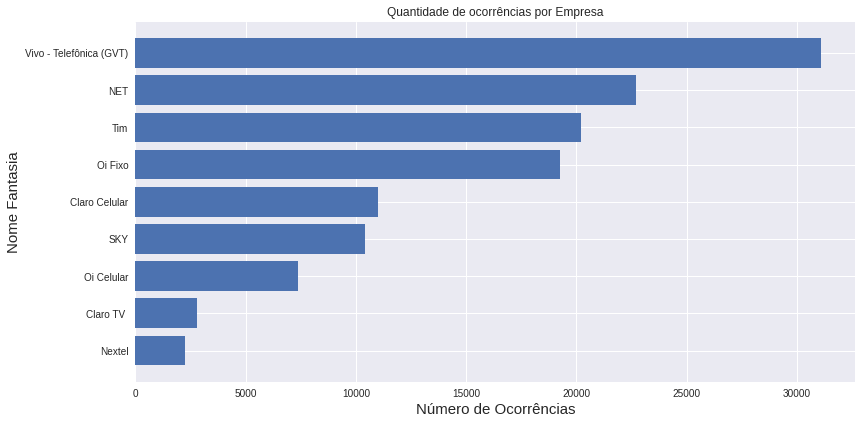

In [ ]:
ocorrencias = df['Nome Fantasia'].value_counts(ascending=True).reset_index()
ocorrencias.columns = ['Empresa', 'Ocorrência']
ocorrencias = ocorrencias[ocorrencias['Ocorrência'] > 1000]

fig = plt.figure(figsize=[10, 5])
ex = fig.add_axes([0, 0, 1, 1])
indices = range(len(ocorrencias))
ex.set_yticks(indices)
ex.set_yticklabels(ocorrencias['Empresa'])
ex.barh(indices, ocorrencias['Ocorrência'])
ex.set_ylabel('Nome Fantasia', fontsize=15)
ex.set_xlabel('Número de Ocorrências', fontsize=15)
ex.set_title('Quantidade de ocorrências por Empresa')

# Qual empresa é menos notificada?

In [46]:
resultado = pd.crosstab(df['UF'], df['Sexo'])
resultado

Sexo,F,M
UF,,
AC,189,364
AL,208,511
AM,455,801
AP,53,129
BA,2527,4212
CE,1139,1792
DF,2253,3634
ES,1705,2471
GO,2102,2981


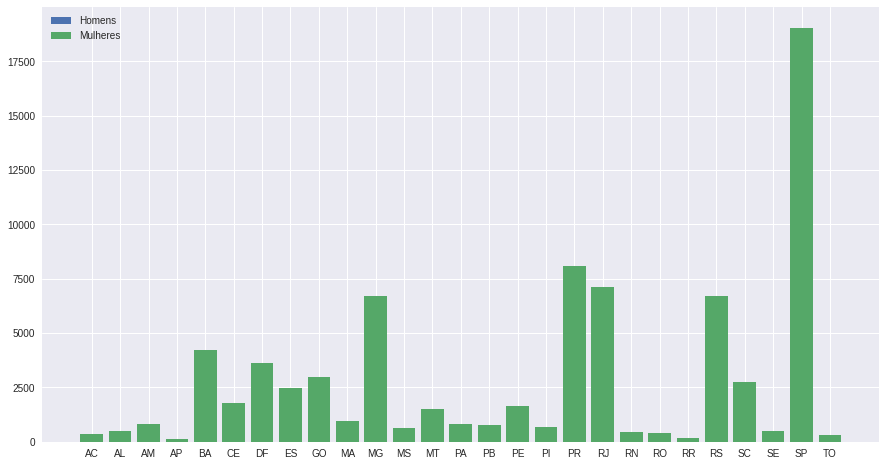

In [47]:
quantidade_feminino = resultado['F']
quantidade_masculino = resultado['M']
indices = resultado.index

plt.figure(figsize=[15, 8])
plt.bar(indices, quantidade_feminino)
plt.bar(indices, quantidade_masculino)
plt.legend(['Homens', 'Mulheres'])

Text(0.5, 1.0, 'Masculino x Feminino por estado')

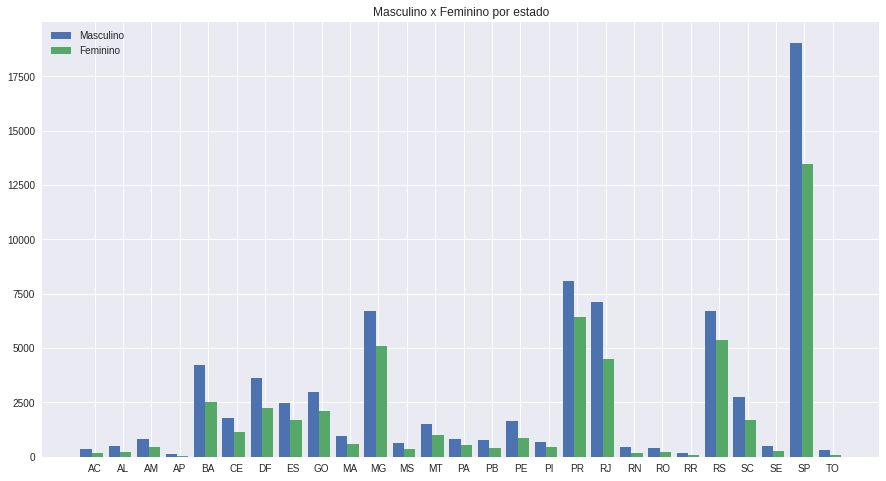

In [59]:
import numpy as np

analise = df[['UF', 'Sexo']]
resultado = pd.crosstab(df['UF'], df['Sexo'])
indices = resultado.index

quantidade_feminino = resultado['F']
quantidade_masculino = resultado['M']

fig, ax = plt.subplots(figsize=[15,8])
x = np.arange(len(indices))
ax.set_xticks(x)
ax.set_xticklabels(indices)
ax.bar(x-0.3, quantidade_masculino, width=0.4)
ax.bar(x+0.1, quantidade_feminino, width=0.4)
plt.legend(['Masculino', 'Feminino'])
plt.title('Masculino x Feminino por estado')

# Visualizar a quantidade de sim e não por faixa etária e nos estados

In [67]:
analise = df[['UF', 'Faixa Etária', 'Procurou Empresa']]
resultado = pd.crosstab(analise['UF'], [analise['Faixa Etária'], analise['Procurou Empresa']])

Text(0, 0.5, 'Número de pessoas')

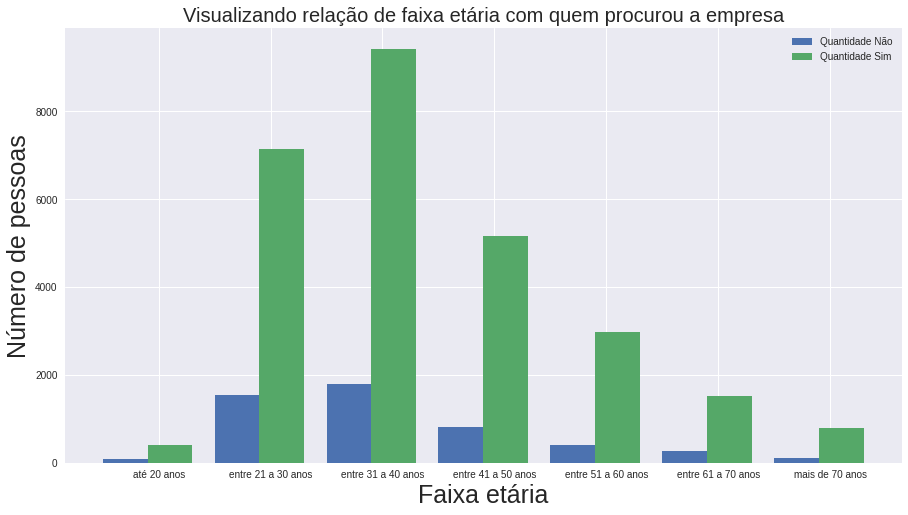

In [83]:
analise_estado = resultado.loc['SP']
valores = analise_estado.unstack(level=1)
quantidade_nao = list(valores['N'])
quantidade_sim = list(valores['S'])
labels = list(analise_estado.unstack(level=0))

fig, ax = plt.subplots(figsize=[15,8])
eixo_x = np.arange(len(labels))
ax.set_xticks(eixo_x)
ax.set_xticklabels(indices)
ax.bar(eixo_x-0.3, quantidade_nao, width=0.4)
ax.bar(eixo_x+0.1, quantidade_sim, width=0.4)
plt.legend(['Quantidade Não', 'Quantidade Sim'])

plt.title('Visualizando relação de faixa etária com quem procurou a empresa', fontsize=20)
ax.set_xlabel('Faixa etária', fontsize=25)
ax.set_ylabel('Número de pessoas', fontsize=25)

# Datetime pandas

In [86]:
import datetime as dt
pd.datetime(2020, 8, 1)
pd.datetime.now().date()
pd.datetime.now()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.


datetime.datetime(2020, 8, 1, 18, 19, 26, 563975)

In [87]:
data_com_hora = pd.datetime(2020, 8, 1, 15, 20, 55)
print(data_com_hora)

2020-08-01 15:20:55


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [88]:
pd.Timestamp('2020-08-01 15:20:55')

Timestamp('2020-08-01 15:20:55')

In [89]:
data = pd.Timestamp('now')
print(data)

2020-08-01 18:23:29.715381


In [93]:
hoje = pd.Timestamp('now').date()
print(hoje)
resultado = hoje + pd.Timedelta(days=365)
print(resultado)

2020-08-01
2021-08-01


In [94]:
data_inicial = pd.Timestamp('now').date()
data_final = pd.Timestamp('2021-01-01').date()
print(data_final - data_inicial)

153 days, 0:00:00


In [96]:
data = pd.to_datetime('Aug 01, 2020')
data

Timestamp('2020-08-01 00:00:00')

In [102]:
data_sem_fuso = pd.Timestamp('now')
data_sem_fuso

Timestamp('2020-08-01 18:35:53.302700')

In [101]:
import pytz as tz

#for i in tz.all_timezones:
#  print(i)

In [106]:
instante = data_sem_fuso.tz_localize('UTC')
instante.tz_convert('Brazil/East')

Timestamp('2020-08-01 15:35:53.302700-0300', tz='Brazil/East')

In [107]:
df['Data Finalização'] = pd.to_datetime(df['Data Finalização'])
df.index = df['Data Finalização']
df.loc['2019'].count()

Região                    128408
UF                        128408
Cidade                    128408
Sexo                      128408
Faixa Etária              128408
Data Finalização          128408
Tempo Resposta            128345
Nome Fantasia             128408
Segmento de Mercado       128408
Área                      128408
Assunto                   128408
Grupo Problema            128408
Problema                  128408
Como Comprou Contratou    128408
Procurou Empresa          128408
Respondida                128408
Situação                  128408
Avaliação Reclamação      128408
Nota do Consumidor         83249
Total                     128408
dtype: int64

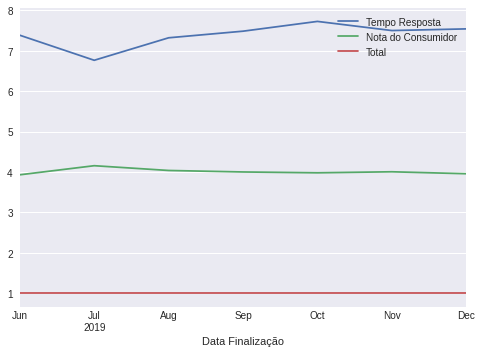

In [108]:
df['2019-06':'2019-12'].resample('M').mean().plot()

In [111]:
df['Data Abertura'] = df['Data Finalização'] - pd.to_timedelta(df['Tempo Resposta'], unit='d')
df.tail(1)

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total,Data Abertura
Data Finalização,,,,,,,,,,,,,,,,,,,,,
2019-12-26,S,PR,Turvo,F,entre 21 a 30 anos,2019-12-26,2.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Vício de Qualidade,Funcionamento inadequado do serviço (má qualid...,Loja física,N,S,Finalizada não avaliada,Não Avaliada,NaN,1,2019-12-24
